In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Exploring the Dataset

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={'v1':'Class','v2':'sms'},inplace=True)

In [6]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [8]:
df.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('Class').describe()

sms                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

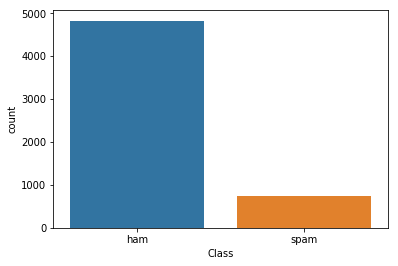

In [10]:
sns.countplot(data=df,x='Class')

In [11]:
df['label']=df.Class.map({'ham':0,'spam':1})

In [12]:
df.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
X=df.sms
y=df.label

In [14]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


# Split Datset Training and Test 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vec=CountVectorizer(stop_words='english')

In [20]:
vec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [21]:
vec.vocabulary_

{'okay': 4320,
 'thought': 6030,
 'expert': 2396,
 'smile': 5473,
 'pleasure': 4594,
 'pain': 4423,
 'trouble': 6179,
 'pours': 4672,
 'like': 3619,
 'rain': 4849,
 'sum1': 5793,
 'hurts': 3132,
 'becoz': 1116,
 'loves': 3730,
 'smiling': 5477,
 'oh': 4314,
 'icic': 3152,
 'lor': 3702,
 'den': 1983,
 'meet': 3892,
 'day': 1928,
 'great': 2842,
 'attracts': 986,
 'brothas': 1325,
 'moment': 4018,
 'value': 6348,
 'morning': 4041,
 'brings': 1312,
 'hope': 3071,
 'afternoon': 756,
 'faith': 2427,
 'evening': 2351,
 'luv': 3758,
 'night': 4204,
 'rest': 5031,
 'wish': 6597,
 'today': 6092,
 'good': 2799,
 'mon': 4021,
 'okie': 4323,
 'haha': 2898,
 'best': 1152,
 'cheap': 1532,
 'gd': 2724,
 'food': 2584,
 'la': 3504,
 'ex': 2370,
 'oso': 4379,
 'depends': 1993,
 'wana': 6461,
 'eat': 2220,
 'western': 6546,
 'chinese': 1570,
 'prefer': 4701,
 'ok': 4319,
 'early': 2212,
 'having': 2955,
 'project': 4758,
 'meeting': 3894,
 'ugh': 6240,
 'hopefully': 3073,
 'asus': 968,
 'ppl': 4676,
 'do

In [22]:
print(vec.get_feature_names)
print(len(vec.get_feature_names()))

<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>
6782


In [23]:
X_train_transfrom = vec.transform(X_train)
X_test_transfrom = vec.transform(X_test)

In [24]:
print(type(X_train_transfrom))
print(X_train_transfrom)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 2396)	1
  (0, 4320)	1
  (0, 6030)	1
  (1, 1116)	1
  (1, 3132)	1
  (1, 3619)	1
  (1, 3730)	1
  (1, 4423)	1
  (1, 4594)	1
  (1, 4672)	1
  (1, 4849)	1
  (1, 5473)	5
  (1, 5477)	1
  (1, 5793)	1
  (1, 6179)	1
  (2, 1928)	1
  (2, 1983)	1
  (2, 3152)	1
  (2, 3702)	1
  (2, 3892)	1
  (2, 4314)	1
  (3, 986)	1
  (3, 1325)	1
  (3, 2842)	1
  (4, 756)	1
  :	:
  (3728, 1522)	1
  (3728, 3010)	1
  (3728, 3544)	1
  (3728, 5000)	1
  (3728, 5545)	1
  (3729, 1509)	1
  (3729, 1983)	1
  (3729, 3364)	1
  (3729, 3603)	1
  (3729, 4106)	1
  (3729, 4314)	2
  (3729, 4577)	1
  (3729, 6712)	1
  (3730, 3120)	1
  (3730, 4371)	1
  (3730, 4420)	1
  (3730, 6023)	1
  (3731, 1669)	1
  (3731, 2868)	1
  (3731, 3744)	1
  (3731, 4314)	1
  (3731, 4730)	1
  (3731, 6304)	1
  (3732, 1528)	1
  (3732, 5485)	1


# Classifier Using Multinomial NaiveBayes

In [25]:
from sklearn.naive_bayes import MultinomialNB


In [26]:
mnb= MultinomialNB()

In [27]:
mnb.fit(X_train_transfrom,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
predict = mnb.predict(X_test_transfrom)
predict_prob=mnb.predict_proba(X_test_transfrom)

# Classification Report and Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

[[1591    7]
 [  21  220]]


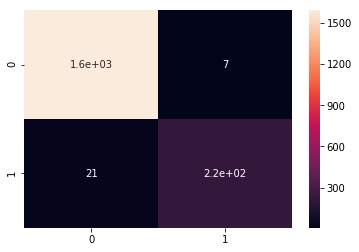

In [38]:
print(confusion_matrix(y_test,predict))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predict)))
print('Precision score: {}'.format(precision_score(y_test, predict)))
print('Recall score: {}'.format(recall_score(y_test, predict)))
print('F1 score: {}'.format(f1_score(y_test, predict)))

Accuracy score: 0.9847743338771071
Precision score: 0.9691629955947136
Recall score: 0.9128630705394191
F1 score: 0.9401709401709402


In [40]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1598
           1       0.97      0.91      0.94       241

   micro avg       0.98      0.98      0.98      1839
   macro avg       0.98      0.95      0.97      1839
weighted avg       0.98      0.98      0.98      1839



In [41]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
predict_prob

array([[9.71377247e-01, 2.86227533e-02],
       [9.96634320e-01, 3.36568016e-03],
       [9.97178417e-01, 2.82158310e-03],
       ...,
       [9.99386517e-01, 6.13483246e-04],
       [9.99997247e-01, 2.75262691e-06],
       [9.99991840e-01, 8.16021769e-06]])

In [43]:
from sklearn.metrics import roc_curve, auc

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [45]:
print(roc_auc)

0.982871483545303


In [46]:
print(true_positive_rate)

[0.         0.28215768 0.29045643 0.31950207 0.32780083 0.34439834
 0.35684647 0.38589212 0.39419087 0.45228216 0.46058091 0.49792531
 0.50622407 0.57261411 0.58091286 0.61410788 0.62240664 0.62655602
 0.63485477 0.80912863 0.81742739 0.83817427 0.83817427 0.84232365
 0.85062241 0.85477178 0.85477178 0.90456432 0.90456432 0.90871369
 0.90871369 0.91286307 0.91286307 0.91286307 0.91286307 0.91701245
 0.91701245 0.91701245 0.91701245 0.92116183 0.92116183 0.92116183
 0.92116183 0.9253112  0.9253112  0.9253112  0.9253112  0.92946058
 0.92946058 0.93775934 0.93775934 0.94190871 0.94190871 0.94190871
 0.94190871 0.94190871 0.94605809 0.94605809 0.94605809 0.94605809
 0.94605809 0.94605809 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95435685 0.95435685 0.95850622 0.95850622
 0.95850622 0.95850622 0.9626556  0.9626556  0.9626556  0.9626

In [47]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.25782228e-04 6.25782228e-04
 6.25782228e-04 6.25782228e-04 1.25156446e-03 1.25156446e-03
 1.87734668e-03 1.87734668e-03 2.50312891e-03 2.50312891e-03
 4.38047559e-03 6.25782228e-03 8.76095119e-03 8.76095119e-03
 9.38673342e-03 1.12640801e-02 1.18898623e-02 1.18898623e-02
 1.25156446e-02 1.37672090e-02 1.43929912e-02 1.43929912e-02
 1.50187735e-02 1.75219024e-02 1.87734668e-02 1.87734668e-02
 2.00250313e-02 2.00250313e-02 2.75344180e-02 4.06758448e-02
 4.56821026e-02 4.63078849e-02 4.88110138e-02 5.56946183e-02
 5.56946183e-02 5.63204005e-02 5.81977472e-02 6.25782228e-02
 6.44555695e-02 6.57071339e-02 6.57071339e-02 6.69586984e-02
 6.88360451e-02 7.634543

In [48]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999997e-01 9.99999997e-01 9.99999971e-01
 9.99999970e-01 9.99999969e-01 9.99999937e-01 9.99524806e-01
 9.99067602e-01 9.94726047e-01 9.84016620e-01 9.83723396e-01
 9.82248867e-01 9.80759521e-01 9.80737851e-01 8.42389349e-01
 6.70384883e-01 6.66340231e-01 6.42628625e-01 6.36646172e-01
 5.33176675e-01 4.91020285e-01 4.15881761e-01 4.08467833e-01
 3.98279461e-01 3.83851126e-01 3.56530330e-01 3.52797447e-01
 3.51128343e-01 2.96105848e-01 2.68091051e-01 2.60462386e-01
 2.55402602e-01 2.37509757e-01 2.28594940e-01 2.20251160e-01
 2.08004071e-01 1.93806547e-01 1.37945924e-01 1.35547817e-01
 1.34758055e-01 1.34558928e-01 1.33190185e-01 9.90074169e-02
 9.84805809e-02 9.62776546e-02 9.40639969e-02 8.57192597e-02
 8.12188459e-02 7.77969895e-02 7.62444013e-02 7.35009812e-02
 7.22469570e-02 5.930002

In [49]:
New_df=pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

In [50]:
New_df

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.282158,0.000000
2,1.000000e+00,0.290456,0.000000
3,1.000000e+00,0.319502,0.000000
4,1.000000e+00,0.327801,0.000000
5,1.000000e+00,0.344398,0.000000
6,1.000000e+00,0.356846,0.000000
7,1.000000e+00,0.385892,0.000000
8,1.000000e+00,0.394191,0.000000
9,1.000000e+00,0.452282,0.000000


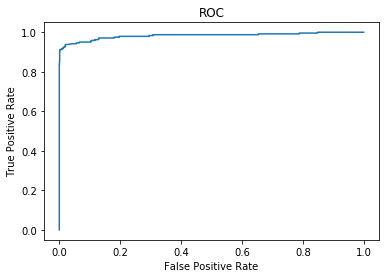

In [51]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

# Classifier Using Bernoulli NaiveBayes

In [52]:
from sklearn.naive_bayes import BernoulliNB


In [53]:
bnb = BernoulliNB()


In [54]:
bnb.fit(X_train_transfrom,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [55]:
b_predict=bnb.predict(X_test_transfrom)
b_predict_prob=bnb.predict_proba(X_test_transfrom)

# Classification Report and Confusion Matrix

[[1598    0]
 [  55  186]]


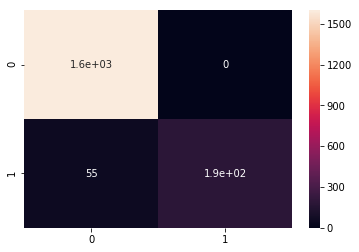

In [58]:
print(confusion_matrix(y_test,b_predict))
sns.heatmap(confusion_matrix(y_test,b_predict),annot=True)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, b_predict)))
print('Precision score: {}'.format(precision_score(y_test, b_predict)))
print('Recall score: {}'.format(recall_score(y_test, b_predict)))
print('F1 score: {}'.format(f1_score(y_test, b_predict)))

Accuracy score: 0.9700924415443176
Precision score: 1.0
Recall score: 0.7717842323651453
F1 score: 0.8711943793911008


In [60]:
print(classification_report(y_test,b_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1598
           1       1.00      0.77      0.87       241

   micro avg       0.97      0.97      0.97      1839
   macro avg       0.98      0.89      0.93      1839
weighted avg       0.97      0.97      0.97      1839



In [61]:
lse_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [62]:
print(roc_auc)

0.982871483545303


In [63]:
print(true_positive_rate)

[0.         0.28215768 0.29045643 0.31950207 0.32780083 0.34439834
 0.35684647 0.38589212 0.39419087 0.45228216 0.46058091 0.49792531
 0.50622407 0.57261411 0.58091286 0.61410788 0.62240664 0.62655602
 0.63485477 0.80912863 0.81742739 0.83817427 0.83817427 0.84232365
 0.85062241 0.85477178 0.85477178 0.90456432 0.90456432 0.90871369
 0.90871369 0.91286307 0.91286307 0.91286307 0.91286307 0.91701245
 0.91701245 0.91701245 0.91701245 0.92116183 0.92116183 0.92116183
 0.92116183 0.9253112  0.9253112  0.9253112  0.9253112  0.92946058
 0.92946058 0.93775934 0.93775934 0.94190871 0.94190871 0.94190871
 0.94190871 0.94190871 0.94605809 0.94605809 0.94605809 0.94605809
 0.94605809 0.94605809 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747 0.95020747
 0.95020747 0.95020747 0.95435685 0.95435685 0.95850622 0.95850622
 0.95850622 0.95850622 0.9626556  0.9626556  0.9626556  0.9626

In [64]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.25782228e-04 6.25782228e-04
 6.25782228e-04 6.25782228e-04 1.25156446e-03 1.25156446e-03
 1.87734668e-03 1.87734668e-03 2.50312891e-03 2.50312891e-03
 4.38047559e-03 6.25782228e-03 8.76095119e-03 8.76095119e-03
 9.38673342e-03 1.12640801e-02 1.18898623e-02 1.18898623e-02
 1.25156446e-02 1.37672090e-02 1.43929912e-02 1.43929912e-02
 1.50187735e-02 1.75219024e-02 1.87734668e-02 1.87734668e-02
 2.00250313e-02 2.00250313e-02 2.75344180e-02 4.06758448e-02
 4.56821026e-02 4.63078849e-02 4.88110138e-02 5.56946183e-02
 5.56946183e-02 5.63204005e-02 5.81977472e-02 6.25782228e-02
 6.44555695e-02 6.57071339e-02 6.57071339e-02 6.69586984e-02
 6.88360451e-02 7.634543

In [65]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999997e-01 9.99999997e-01 9.99999971e-01
 9.99999970e-01 9.99999969e-01 9.99999937e-01 9.99524806e-01
 9.99067602e-01 9.94726047e-01 9.84016620e-01 9.83723396e-01
 9.82248867e-01 9.80759521e-01 9.80737851e-01 8.42389349e-01
 6.70384883e-01 6.66340231e-01 6.42628625e-01 6.36646172e-01
 5.33176675e-01 4.91020285e-01 4.15881761e-01 4.08467833e-01
 3.98279461e-01 3.83851126e-01 3.56530330e-01 3.52797447e-01
 3.51128343e-01 2.96105848e-01 2.68091051e-01 2.60462386e-01
 2.55402602e-01 2.37509757e-01 2.28594940e-01 2.20251160e-01
 2.08004071e-01 1.93806547e-01 1.37945924e-01 1.35547817e-01
 1.34758055e-01 1.34558928e-01 1.33190185e-01 9.90074169e-02
 9.84805809e-02 9.62776546e-02 9.40639969e-02 8.57192597e-02
 8.12188459e-02 7.77969895e-02 7.62444013e-02 7.35009812e-02
 7.22469570e-02 5.930002

In [66]:
New_dff=pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

In [67]:
print(New_dff)

        Threshold       TPR       FPR
0    2.000000e+00  0.000000  0.000000
1    1.000000e+00  0.282158  0.000000
2    1.000000e+00  0.290456  0.000000
3    1.000000e+00  0.319502  0.000000
4    1.000000e+00  0.327801  0.000000
5    1.000000e+00  0.344398  0.000000
6    1.000000e+00  0.356846  0.000000
7    1.000000e+00  0.385892  0.000000
8    1.000000e+00  0.394191  0.000000
9    1.000000e+00  0.452282  0.000000
10   1.000000e+00  0.460581  0.000000
11   1.000000e+00  0.497925  0.000000
12   1.000000e+00  0.506224  0.000000
13   1.000000e+00  0.572614  0.000000
14   1.000000e+00  0.580913  0.000000
15   1.000000e+00  0.614108  0.000000
16   1.000000e+00  0.622407  0.000000
17   1.000000e+00  0.626556  0.000000
18   9.999999e-01  0.634855  0.000000
19   9.995248e-01  0.809129  0.000000
20   9.990676e-01  0.817427  0.000000
21   9.947260e-01  0.838174  0.000000
22   9.840166e-01  0.838174  0.000626
23   9.837234e-01  0.842324  0.000626
24   9.822489e-01  0.850622  0.000626
25   9.80759

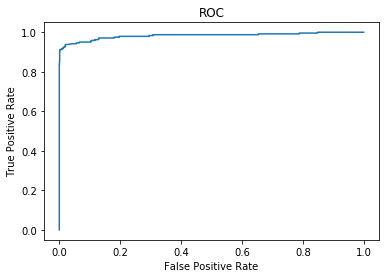

In [68]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)